In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
!pip install pandas

In [5]:
import pandas as pd
df = pd.read_csv('nba.csv')

In [6]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [7]:
from langchain.chat_models import AzureChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [8]:
llm = AzureChatOpenAI(
    azure_endpoint=os.getenv("AZURE_ENDPOINT"),  # 从环境变量读取
    openai_api_version=os.getenv("OPENAI_API_VERSION"),
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    deployment_name="gpt-4o-mini",
    model_name="gpt-4o-mini",
    temperature=0.7
)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_17896\2764354304.py:1: LangChainDeprecationWarning: The class `AzureChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import AzureChatOpenAI``.
  llm = AzureChatOpenAI(
D:\Anaconda\envs\myenv\Lib\site-packages\langchain_community\chat_models\azure_openai.py:174: UserWarning: As of openai>=1.0.0, Azure endpoints should be specified via the `azure_endpoint` param not `openai_api_base` (or alias `base_url`). Updating `openai_api_base` from https://pcg-east-us-2.openai.azure.com/ to https://pcg-east-us-2.openai.azure.com/openai.
  warnings.warn(
D:\Anaconda\envs\myenv\Lib\site-packages\langchain_community\chat_models\azure_openai.py:181: UserWarning: As of openai>=1.0.0, if `deployment_name` (or alias `azure_deplo

In [9]:
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe a team that hires the {player}?"
)

In [10]:
chain = LLMChain(llm=llm, prompt=prompt)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_17896\1305865249.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)


In [11]:
player = "Jonas Jerebko"
chain.invoke(player)

{'player': 'Jonas Jerebko',
 'text': 'A fitting name for a team that hires Jonas Jerebko could be "Jerebko\'s Juggernauts" or "Jerebko\'s Warriors." These names highlight his strong presence on the court and convey a sense of power and determination. If you want something more playful, you could consider "Jerebko\'s Jetsetters" to emphasize agility and speed. Ultimately, the best name would depend on the team\'s overall identity and style of play!'}

In [59]:
from langchain.chains import SimpleSequentialChain
#事实上，该模块被标记为弃用，后面直接使用‘|’来构建pipeline
from langchain.chains import SequentialChain

In [13]:
llm = AzureChatOpenAI(
    azure_endpoint=os.getenv("AZURE_ENDPOINT"),  # 从环境变量读取
    openai_api_version=os.getenv("OPENAI_API_VERSION"),
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    deployment_name="gpt-4o-mini",
    model_name="gpt-4o-mini",
    temperature=0.7
)

D:\Anaconda\envs\myenv\Lib\site-packages\langchain_community\chat_models\azure_openai.py:174: UserWarning: As of openai>=1.0.0, Azure endpoints should be specified via the `azure_endpoint` param not `openai_api_base` (or alias `base_url`). Updating `openai_api_base` from https://pcg-east-us-2.openai.azure.com/ to https://pcg-east-us-2.openai.azure.com/openai.
  warnings.warn(
D:\Anaconda\envs\myenv\Lib\site-packages\langchain_community\chat_models\azure_openai.py:181: UserWarning: As of openai>=1.0.0, if `deployment_name` (or alias `azure_deployment`) is specified then `openai_api_base` (or alias `base_url`) should not be. Instead use `deployment_name` (or alias `azure_deployment`) and `azure_endpoint`.
  warnings.warn(
D:\Anaconda\envs\myenv\Lib\site-packages\langchain_community\chat_models\azure_openai.py:189: UserWarning: As of openai>=1.0.0, if `openai_api_base` (or alias `base_url`) is specified it is expected to be of the form https://example-resource.azure.openai.com/openai/depl

In [14]:
#prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe a team that hires the {player}?"
)

#chain 1
chain_1 = first_prompt|llm

In [15]:
#prompt template 1
second_prompt = ChatPromptTemplate.from_template(
    "Wriet a 20 words description for the team {team_name}."
)

#chain 2
chain_2 = second_prompt|llm

In [16]:
overall_simple_chain = chain_1|chain_2
#新版本可以直接写：first_prompt|llm|second_prompt|llm

In [17]:
player = ""
response = overall_simple_chain.invoke(player)
print(response.content)

"Jerebko's Juggernauts" embodies strength and competitive spirit, while "Jerebko's All-Stars" emphasizes talent and skill on the court.


In [75]:
from langchain_core.output_parsers import StrOutputParser
prompt1 = ChatPromptTemplate.from_template(
    "What is the best word to describe that player {player}?"
)
chain1 = prompt1|llm|StrOutputParser()

prompt2 = ChatPromptTemplate.from_template(
    "What is the origin of this word {word}?"
)
chain2 = prompt2|llm|StrOutputParser()

prompt3 = ChatPromptTemplate.from_template(
    "Which team does {player} plays for?"
)
chain3 = prompt3|llm|StrOutputParser()

prompt4 = ChatPromptTemplate.from_template(
    "Is there any relationship between the {origin} and the {team}?"
)
chain4 = prompt4|llm|StrOutputParser()

In [97]:
dict1_2 = {"origin" : ({"word":chain1}|chain2)}
dict3 = {"team" : chain3}
##务必看懂这一段，学会如何构建复杂的链路，我花了一下午www！
final_chain = {"origin" : ({"word":chain1}|chain2), "team" : chain3}|chain4

In [102]:
final_chain_with_outputs = final_chain|{
    "word":chain1,
    "origin":({"word":chain1}|chain2),
    "team":chain3,
    "final_results":final_chain
}

In [103]:
player = "R.J. Hunter"
final_chain_with_outputs.invoke(player)

{'word': 'The best word to describe R.J. Hunter, considering the attributes you\'ve outlined, would be **"versatile."** This term encapsulates his ability to perform multiple roles effectively on the basketball court, combining aspects of skill and dynamism. A versatile player can adapt to various situations during a game, contributing in different ways whether it be through scoring, assisting, or defending. While "skilled" and "dynamic" are also fitting descriptors, "versatile" encompasses the broader range of his capabilities and adaptability as a player.',
 'origin': 'The word "versatile" originates from the Latin term "versatilis," which means "turning" or "turning easily." This Latin word comes from "versare," the frequentative form of "vertere," which means "to turn." The term evolved in English to describe something or someone capable of adapting or being adapted for many different functions or activities. In the context of basketball, describing a player as "versatile" emphasiz

In [100]:
# from langchain_core.output_parsers import StrOutputParser, JsonOutputParser
# from langchain_core.prompts import PromptTemplate
# from openai import BaseModel

# class M(BaseModel):
#     content: str
#     summary: str
# parser = JsonOutputParser(pydantic_object=M)

# summarizing_prompt_template = """
# 总结以下文本为一个 20 字以内的句子，输出格式为原始 json，json 里面有字段 content、summary:
# ---
# {content}
# """
# prompt = PromptTemplate.from_template(summarizing_prompt_template)
# summarizing_chain = prompt | llm | parser

# translating_prompt_template = """
# 将{summary}翻译成英文，输出格式为原始 json，json 里面有字段 content、summary、translated，其中 content 的值为 {content}，summary 的值为 {summary}，translated 的值为翻译后的英文句子。:
# """
# prompt = PromptTemplate.from_template(translating_prompt_template)
# translating_chain = prompt | llm | StrOutputParser()

# overall_chain = summarizing_chain | translating_chain

# print(overall_chain.invoke({"content": "这是一个测试。"}))

In [101]:
final_chain.invoke(player)

'Yes, there is a relationship between the definitions and context you\'ve provided. The word "versatile," which comes from the Latin "versatilis," signifies the ability to adapt or function in various roles or situations. This is particularly relevant when discussing an athlete like R.J. Hunter, who is noted for his capacity to excel in different positions on the basketball court.\n\nHis versatility as a player allows him to contribute to the team in multiple ways, whether through scoring, playmaking, or defensive capabilities. This adaptability is a valuable trait in sports, where players often need to adjust their skills to fit the team\'s needs or the demands of a game.\n\nRegarding R.J. Hunter\'s current status, as of my last update, he was with the Cleveland Charge in the NBA G League. Player rosters can change frequently due to trades and other factors, so it\'s wise to consult the latest news for the most current information on his career. The connection between the concept of v

In [132]:
!pip install langgraph

In [148]:
!pip install langchain-openai

In [149]:
from operator import itemgetter
from typing import Literal

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableConfig
from langchain_openai import AzureChatOpenAI #以后要从langchain_openai导入
from langgraph.graph import END, START, StateGraph
from typing_extensions import TypedDict

In [162]:
load_dotenv()
with open('.env', 'a') as f:
    f.write("AZURE_ENDPOINT=https://pcg-east-us-2.openai.azure.com/")
print(os.getenv("AZURE_ENDPOINT"))

https://pcg-east-us-2.openai.azure.com/


In [163]:
llm = AzureChatOpenAI(
    azure_endpoint=os.getenv("AZURE_ENDPOINT"),  # 从环境变量读取
    openai_api_version=os.getenv("OPENAI_API_VERSION"),
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    deployment_name="gpt-4o-mini",
    model_name="gpt-4o-mini",
    temperature=0.7
)

In [164]:
#定义提示模板
#动物专家链
prompt_1 = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an expert on animals."),
        ("human", "{input}"),
    ]
)
#蔬菜专家链
prompt_2 = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an expert on vegetables."),
        ("human", "{input}"),
    ]
)

In [165]:
#构建子链
chain_1 = prompt_1 | llm | StrOutputParser()
chain_2 = prompt_2 | llm | StrOutputParser()

In [166]:
#定义路由链
route_system = "Route the user's query to either the animal or vegetable expert."
route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", route_system),
        ("human", "{input}")
    ]
)

#TypedDict为python的类型提示工具，在python中冒号：用于类型注解
class RouteQuery(TypedDict):
    """Route query to destination expert."""
    destination: Literal["animal", "vegetable"]

route_chain = route_prompt | llm.with_structured_output(RouteQuery)

In [167]:
#定义状态和节点函数
class State(TypedDict):
    query: str
    destination: RouteQuery
    answer: str

async def route_query(state: State, config: RunnableConfig):
    destination = await route_chain.ainvoke(state["query"], config)
    return {"destination": destination}

async def prompt_1(state: State, config: RunnableConfig):
    return {"answer": await chain_1.ainvoke(state["query"], config)}

async def prompt_2(state: State, config: RunnableConfig):
    return {"answer": await chain_2.ainvoke(state["query"], config)}

In [172]:
#定义条件分支逻辑
def select_node(state: State) ->Literal["prompt_1", "prompt_2"]:
    """
    Literal 是 Python 的 typing 模块中的一个工具，
    用于限制变量或返回值只能是某些特定的值。
    """
    if state["destination"] == "animal":
        return "prompt_1"
    else:
        return "prompt_2"

In [169]:
#组装状态图
graph = StateGraph(State)
graph.add_node("route_query", route_query)
graph.add_node("prompt_1", prompt_1)
graph.add_node("prompt_2", prompt_2)

graph.add_edge(START, "route_query")
graph.add_conditional_edges("route_query", select_node)
graph.add_edge("prompt_1", END)
graph.add_edge("prompt_2", END)

app = graph.compile()

In [170]:
#测试
result = await app.ainvoke({"query": "猫科动物有哪些？"})
print(result["answer"])

result = await app.ainvoke({"query": "胡萝卜的营养价值是什么？"})
print(result["answer"])

猫科动物（Felidae）是一类主要包括猫的肉食性哺乳动物。它们通常被分为大猫和小猫两类。以下是一些常见的猫科动物：

1. **大猫**：
   - **狮子**（Panthera leo）
   - **老虎**（Panthera tigris）
   - **豹**（Panthera pardus）
   - **美洲豹**（Panthera onca）
   - **雪豹**（Panthera uncia）
   - **云豹**（Neofelis nebulosa）

2. **小猫**：
   - **家猫**（Felis catus）
   - **野猫**（Felis silvestris）
   - **山猫**（Lynx rufus）
   - **猞猁**（Lynx canadensis）
   - **沙猫**（Felis margarita）
   - **黑足猫**（Felis nigripes）

猫科动物通常具有敏捷的身体和强大的捕猎能力，它们的栖息地和习性各异，分布广泛。
胡萝卜是一种营养丰富的蔬菜，富含多种维生素和矿物质。以下是胡萝卜的主要营养价值：

1. **β-胡萝卜素**：胡萝卜含有丰富的β-胡萝卜素，它是一种抗氧化剂，可以在体内转化为维生素A，有助于维持良好的视力、皮肤健康和免疫功能。

2. **维生素**：胡萝卜是维生素K1、维生素C和维生素B6的良好来源，这些维生素对血液凝固、免疫系统和新陈代谢等方面至关重要。

3. **矿物质**：胡萝卜含有一些重要的矿物质，如钾和锰。钾有助于维持心脏健康和血压平衡，而锰则与代谢和骨骼健康有关。

4. **膳食纤维**：胡萝卜中含有一定量的膳食纤维，有助于消化系统健康，促进肠道蠕动，并有助于维持饱腹感。

5. **低热量**：胡萝卜的热量较低，适合用于减肥和控制体重的饮食中。

总体来说，胡萝卜是一种健康的蔬菜，可以生吃、蒸煮或加入各种菜肴中，既美味又营养。


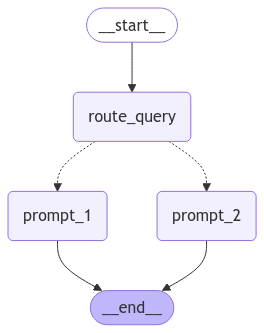

In [173]:
#显示图解
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

In [175]:
#还可以这样调用链
state = await app.ainvoke({"query": "what color are carrots"})
print(state["destination"])
print(state["answer"])

{'destination': 'vegetable'}
Carrots are most commonly associated with an orange color, but they can actually come in a variety of colors, including purple, red, yellow, and white. Each color may have slightly different flavors and nutritional profiles. The orange variety is the most popular and widely consumed, but the other colors are also available and can add visual interest to dishes.
